In [1]:
!pip install feature_engine

  Using cached feature_engine-1.6.2-py2.py3-none-any.whl (328 kB)
  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
  Using cached scipy-1.12.0-cp39-cp39-win_amd64.whl (46.2 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)


You should consider upgrading via the 'c:\users\anmol\downloads\progit\venv\scripts\python.exe -m pip install --upgrade pip' command.


# Melbourne Housing Price Prediction

# Table of contents

>[Importing the Libraries](#scrollTo=e8044615)

>[Importing the dataset](#scrollTo=c6d47ba9)

>[Variable Description:](#scrollTo=30816bed)

>[Exploratory Data Analysis](#scrollTo=bfe9c57d)

>>[Distribution of the Price variable](#scrollTo=fad8a3f8)

>>[Type of Property Vs Price](#scrollTo=e06688d3)

>>[Bottom 5 Suburbs in 2017](#scrollTo=1680c719)

>[Predicting Price with Random Forest Regressor](#scrollTo=0e491485)

>[Splitting the dataset](#scrollTo=2198e0a8)

>[Variable Analysis](#scrollTo=ab108b9c)

>>[Understading Variables](#scrollTo=db9d5694)

>>[Missing Data](#scrollTo=813640a3)

>>[Categorical Variables](#scrollTo=02f86408)

>>[Distribution of Varibales](#scrollTo=258e0fb4)

>[Feature Engineering](#scrollTo=8efdd8a0)

>>[Missing Value Imputation](#scrollTo=eb4e3b63)

>>[Feature Selection](#scrollTo=ec42ea68)

>>[Final Model](#scrollTo=ca02e5c1)



<img src='https://thumbs.dreamstime.com/b/melbourne-skyline-color-buildings-blue-sky-vector-illustration-business-travel-tourism-concept-modern-89679667.jpg' width='1600'/>

# Importing the Libraries

In [5]:
# data operation libraries
import numpy as np
import pandas as pd

# for datetime operation
import datetime as dt

# visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# stats for Q-Q plot
import scipy.stats as stats

# general pandas setting
pd.options.display.max_columns = None

# Importing the dataset

Reading dataset from CSV file

In [6]:
data = pd.read_csv('data.csv')

# Variable Description:

**Rooms**: Number of rooms

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Type**: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**SellerG**: Real Estate Agent

**Date**: Date sold

**Distance**: Distance from CBD

**Regionname**: General Region (West, North West, North, North east …etc)

**Propertycount**: Number of properties that exist in the suburb.

**Bedroom2** : Scraped # of Bedrooms (from different source)

**Bathroom**: Number of Bathrooms

**Car**: Number of carspots

**Landsize**: Land Size

**BuildingArea**: Building Size

**CouncilArea**: Governing council for the area

Printing the first 5 rows

In [7]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Printing the last 5 rows

In [9]:
data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


The code corrects the format of the "Date" column in the dataset by splitting it into day, month, and year components. It then rearranges the components to form a new date string in the format "YYYY/MM/DD". The code converts this new date string to a datetime object using the pd.to_datetime() function. After that, it drops the intermediate columns and creates additional variables such as "Month_name", "day", and "Year" based on the modified date column for future analysis.






In [10]:
# correcting the Date column
# we could have directly pass the parse date variable while importing the file
# but we have some impurities in our original date column which pandas is not
# to understand so it interprets day as month and month as date

data[['Day','Month','Year']] = data['Date'].str.split('/', expand=True)

data['Date'] = data['Year'] + '/' + data['Month'] + '/' + data['Day']

# overwriting the existing date
data['Date'] = pd.to_datetime(data['Date'])

# dropping the helping columns
data.drop(labels=['Day','Month', 'Year'], axis=1, inplace=True)

# creating some useful varible for our future analysis
data['Month_name'] = data['Date'].dt.month_name()

data['day'] = data['Date'].dt.day

data['Year'] = data['Date'].dt.year

Printing the information of the data frame

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  float64       
 10  Bedroom2       13580 non-null  float64       
 11  Bathroom       13580 non-null  float64       
 12  Car            13518 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      8205

Printing the number of unique values in each column

In [12]:
data.nunique()

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
Month_name          12
day                 27
Year                 2
dtype: int64

# Exploratory Data Analysis

##### Distribution of the Price variable

The code sets the plotting style to "ggplot," which is a popular style inspired by the plotting aesthetics of the R programming language's ggplot2 library.






In [13]:
plt.style.use('ggplot')

The code creates a histogram plot with a kernel density estimation (KDE) overlay for the "Price" variable in the dataset. It visualizes the distribution of prices and provides an estimation of the underlying probability density function.






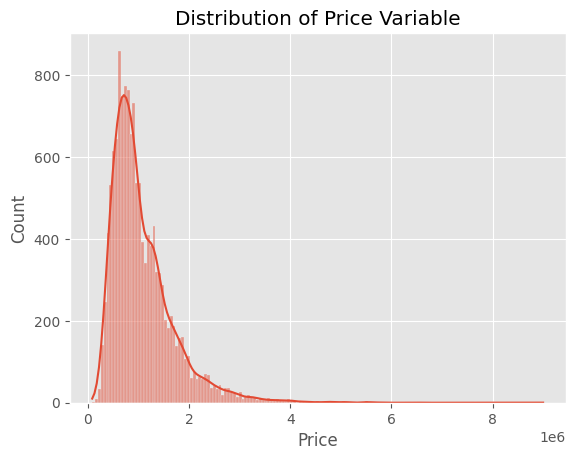

In [14]:
sns.histplot(data=data, x=data.Price, kde=True)
plt.title('Distribution of Price Variable')
plt.show()

##### Type of Property Vs Price

The code creates a figure with a specific size, then plots histograms of the 'Price' variable for three different types of data ('h', 'u', and 't'). Each type is represented by a different color, and the histograms show the distribution of prices. The plot includes labels for the axes, a legend for the types, and displays the plot to visualize the distribution of prices for each type.






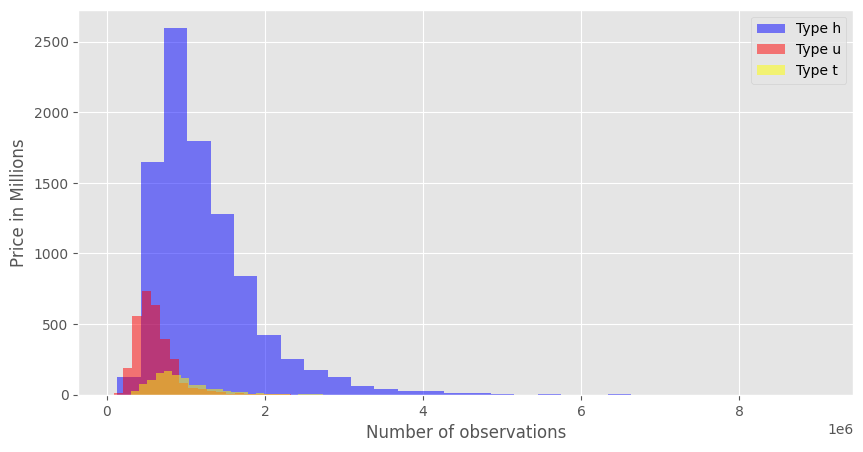

In [15]:
plt.figure(figsize=(10,5))
data[data['Type']=='h']['Price'].hist(alpha=0.5, color='blue',bins=30, label='Type h')
data[data['Type']=='u']['Price'].hist(alpha=0.5, color='red',bins=30, label='Type u')
data[data['Type']=='t']['Price'].hist(alpha=0.5, color='yellow',bins=30, label='Type t')
plt.ylabel('Price in Millions')
plt.xlabel('Number of observations')
plt.legend()
plt.show()

The code creates a large figure with a specific size, then plots multiple scatter plots with regression lines using the lmplot function from seaborn. The scatter plots are grouped by the 'Method' column and arranged in rows by the 'Year' column. The 'Price' variable is plotted on the y-axis, and the 'Distance' variable is plotted on the x-axis. The palette 'gist_earth' is used to set the color scheme. The resulting plots show the relationship between 'Price' and 'Distance' for different combinations of 'Method' and 'Year'.






<Figure size 2500x1500 with 0 Axes>

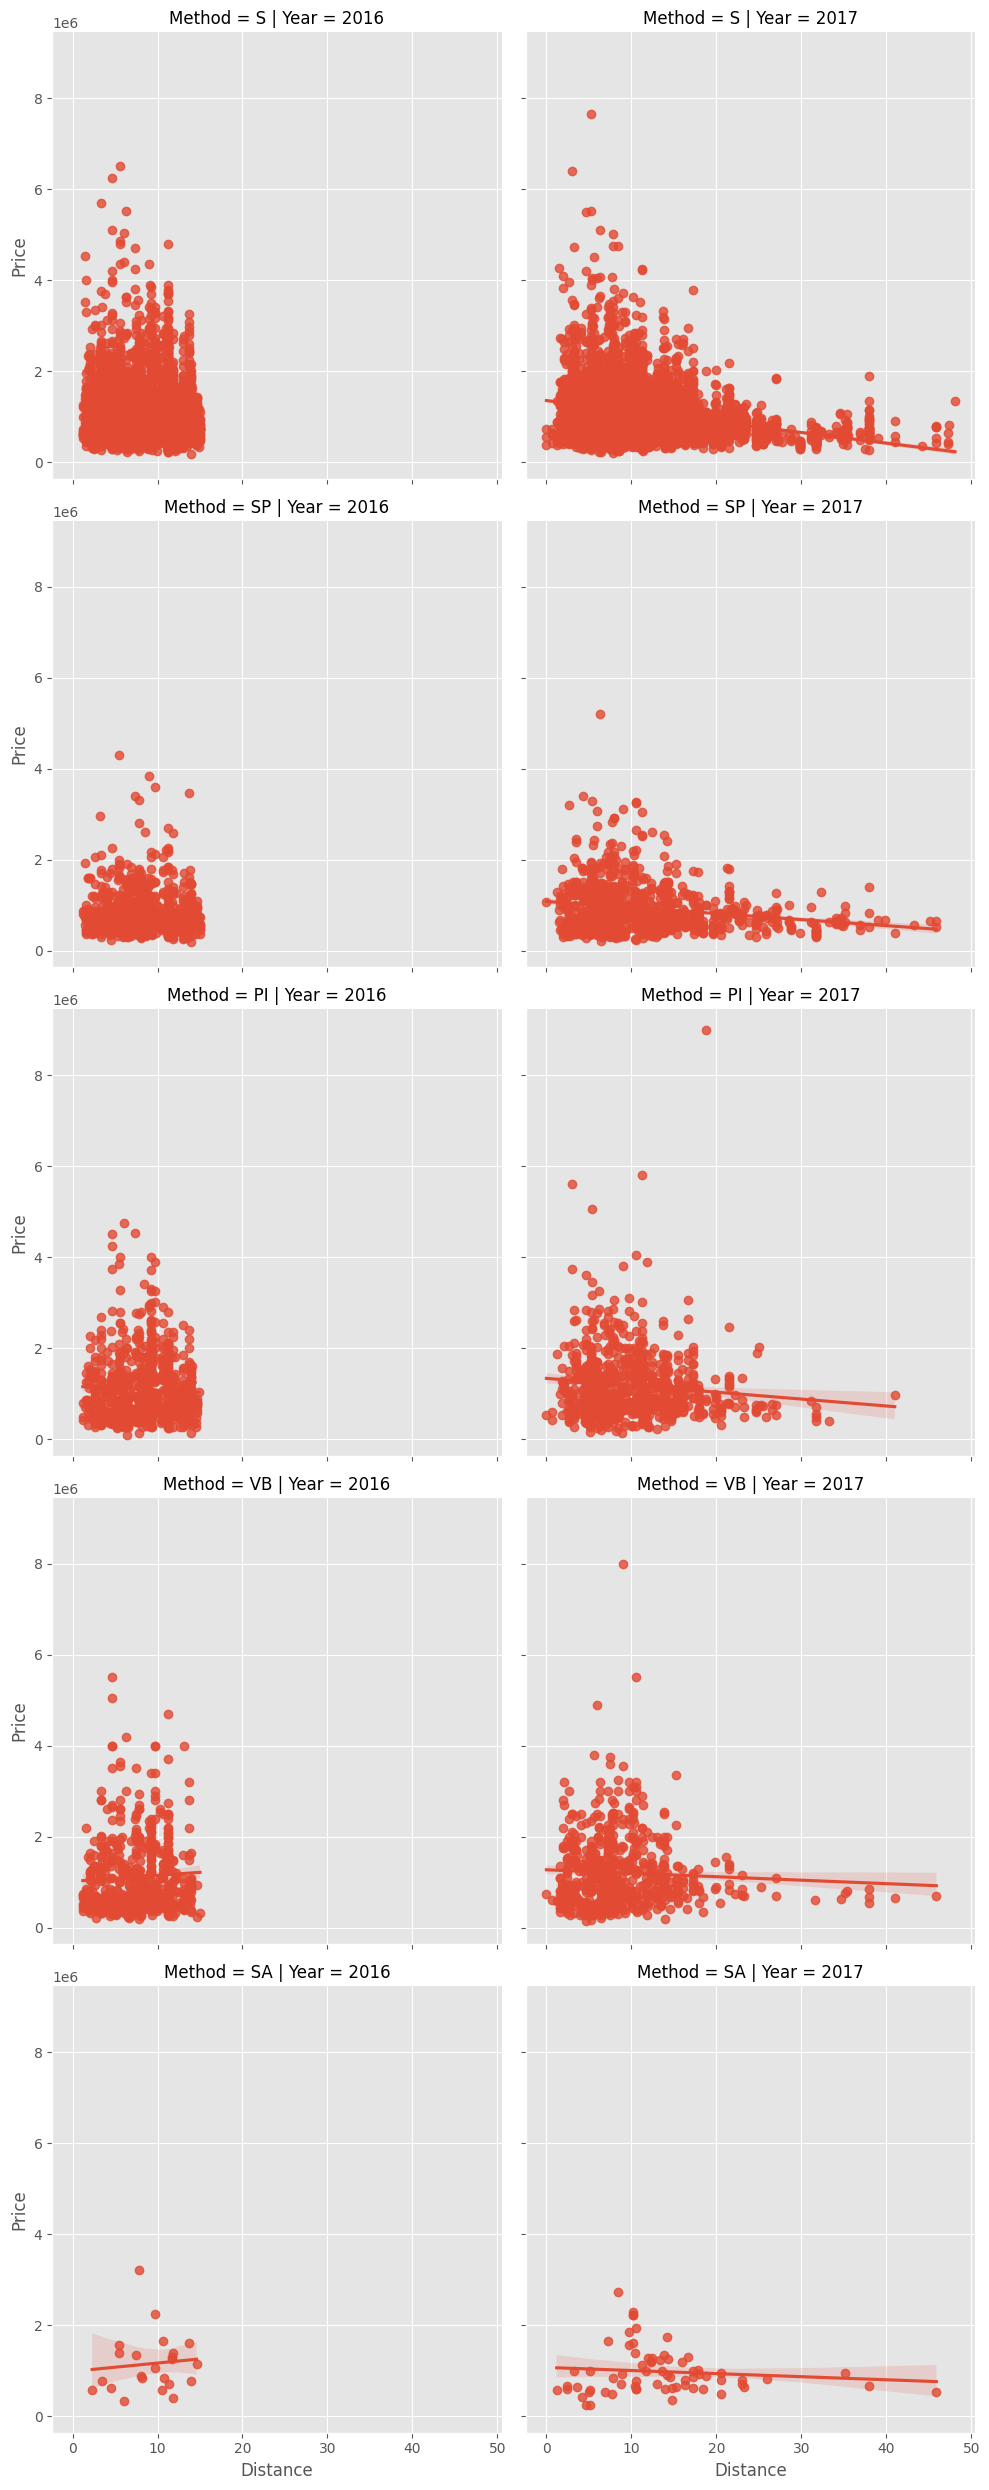

In [16]:
fig = plt.figure(figsize=(25,15))
sns.lmplot(y='Price', x='Distance', data=data, row='Method', col='Year', palette='gist_earth')
plt.show()

The code creates multiple scatter plots using lmplot from seaborn, where 'Rooms' is plotted on the x-axis and 'Price' is plotted on the y-axis. The plots are grouped by the 'Year' column, and a regression line is fit to each plot. The resulting plots show the relationship between the number of rooms and the price for different years.



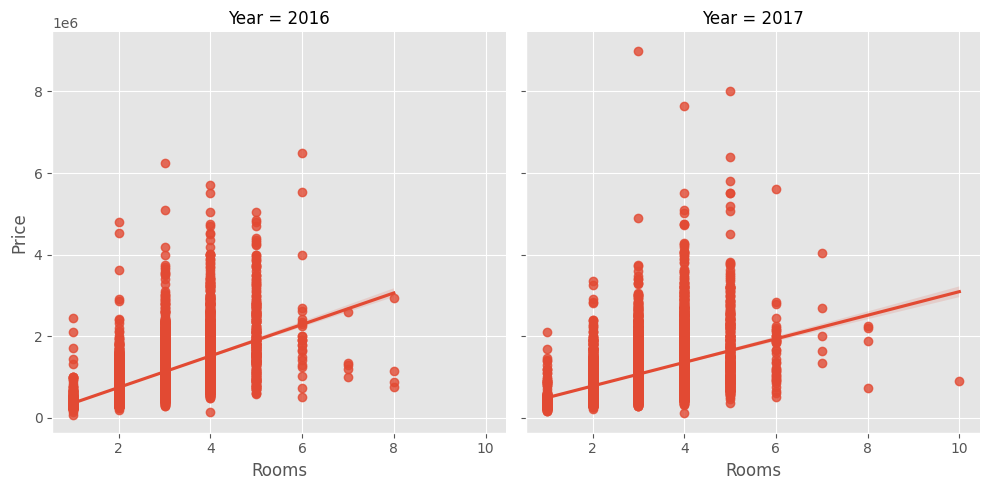

In [17]:
sns.lmplot(data=data, x='Rooms',y='Price', fit_reg=True, col='Year')
plt.show()

The code creates multiple scatter plots using lmplot from seaborn, where 'Bedroom2' is plotted on the x-axis and 'Price' is plotted on the y-axis. The plots are grouped by the 'Year' column, and a regression line is fit to each plot. The resulting plots show the relationship between the number of bedrooms and the price for different years.






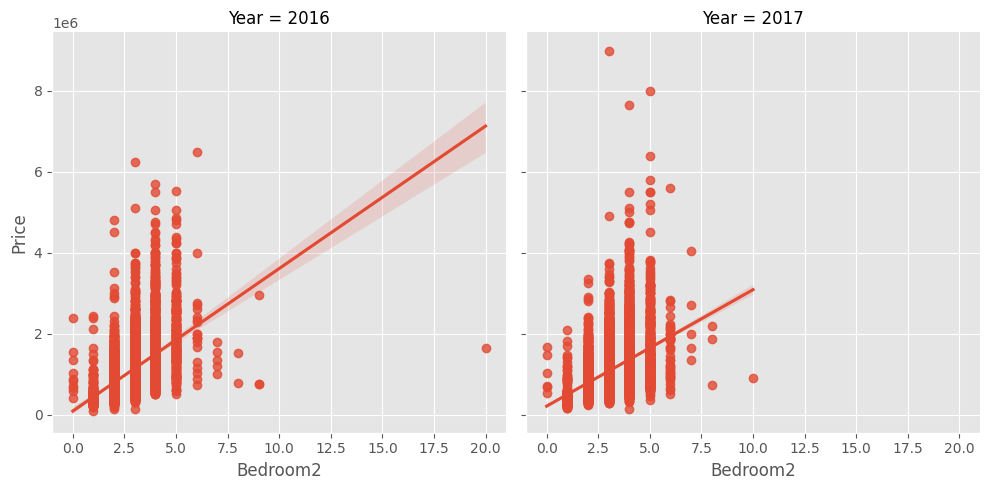

In [18]:
sns.lmplot(data=data, x='Bedroom2',y='Price', fit_reg=True, col='Year')
plt.show()

The code creates multiple scatter plots using lmplot from seaborn, where 'Bathroom' is plotted on the x-axis and 'Price' is plotted on the y-axis. The plots are grouped by the 'Year' column, and a regression line is fit to each plot. The resulting plots show the relationship between the number of bathrooms and the price for different years.






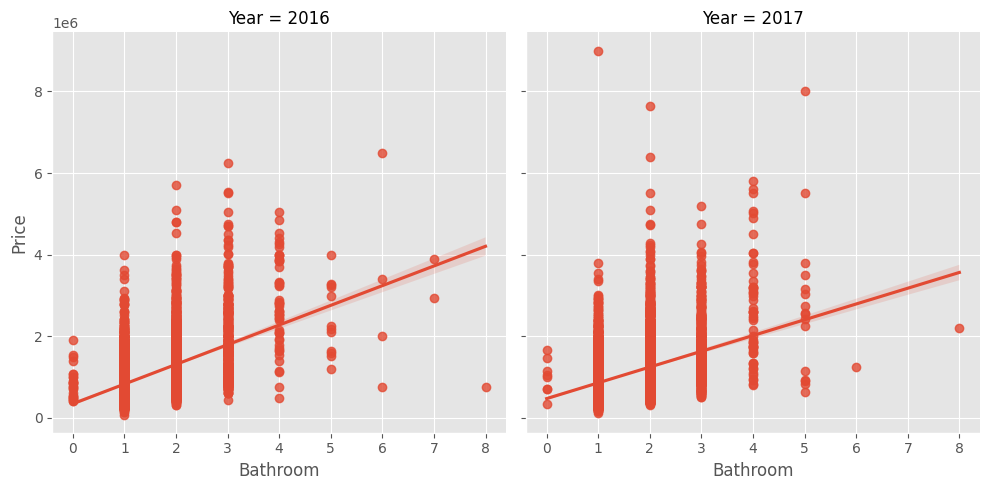

In [19]:
sns.lmplot(data=data, x='Bathroom',y='Price', fit_reg=True, col='Year')
plt.show()

The code creates two new dataframes: 'year_2016_df' which contains the rows from the 'data' dataframe where the 'Year' column is equal to 2016, and 'year_2017_df' which contains the rows where the 'Year' column is equal to 2017.






In [20]:
year_2016_df = data[data['Year']==2016]
year_2017_df = data[data['Year']==2017]

The code creates a figure with two subplots: the first subplot displays a boxplot of 'Price' grouped by 'Regionname' for the year 2016, and the second subplot displays the same boxplot but for the year 2017.






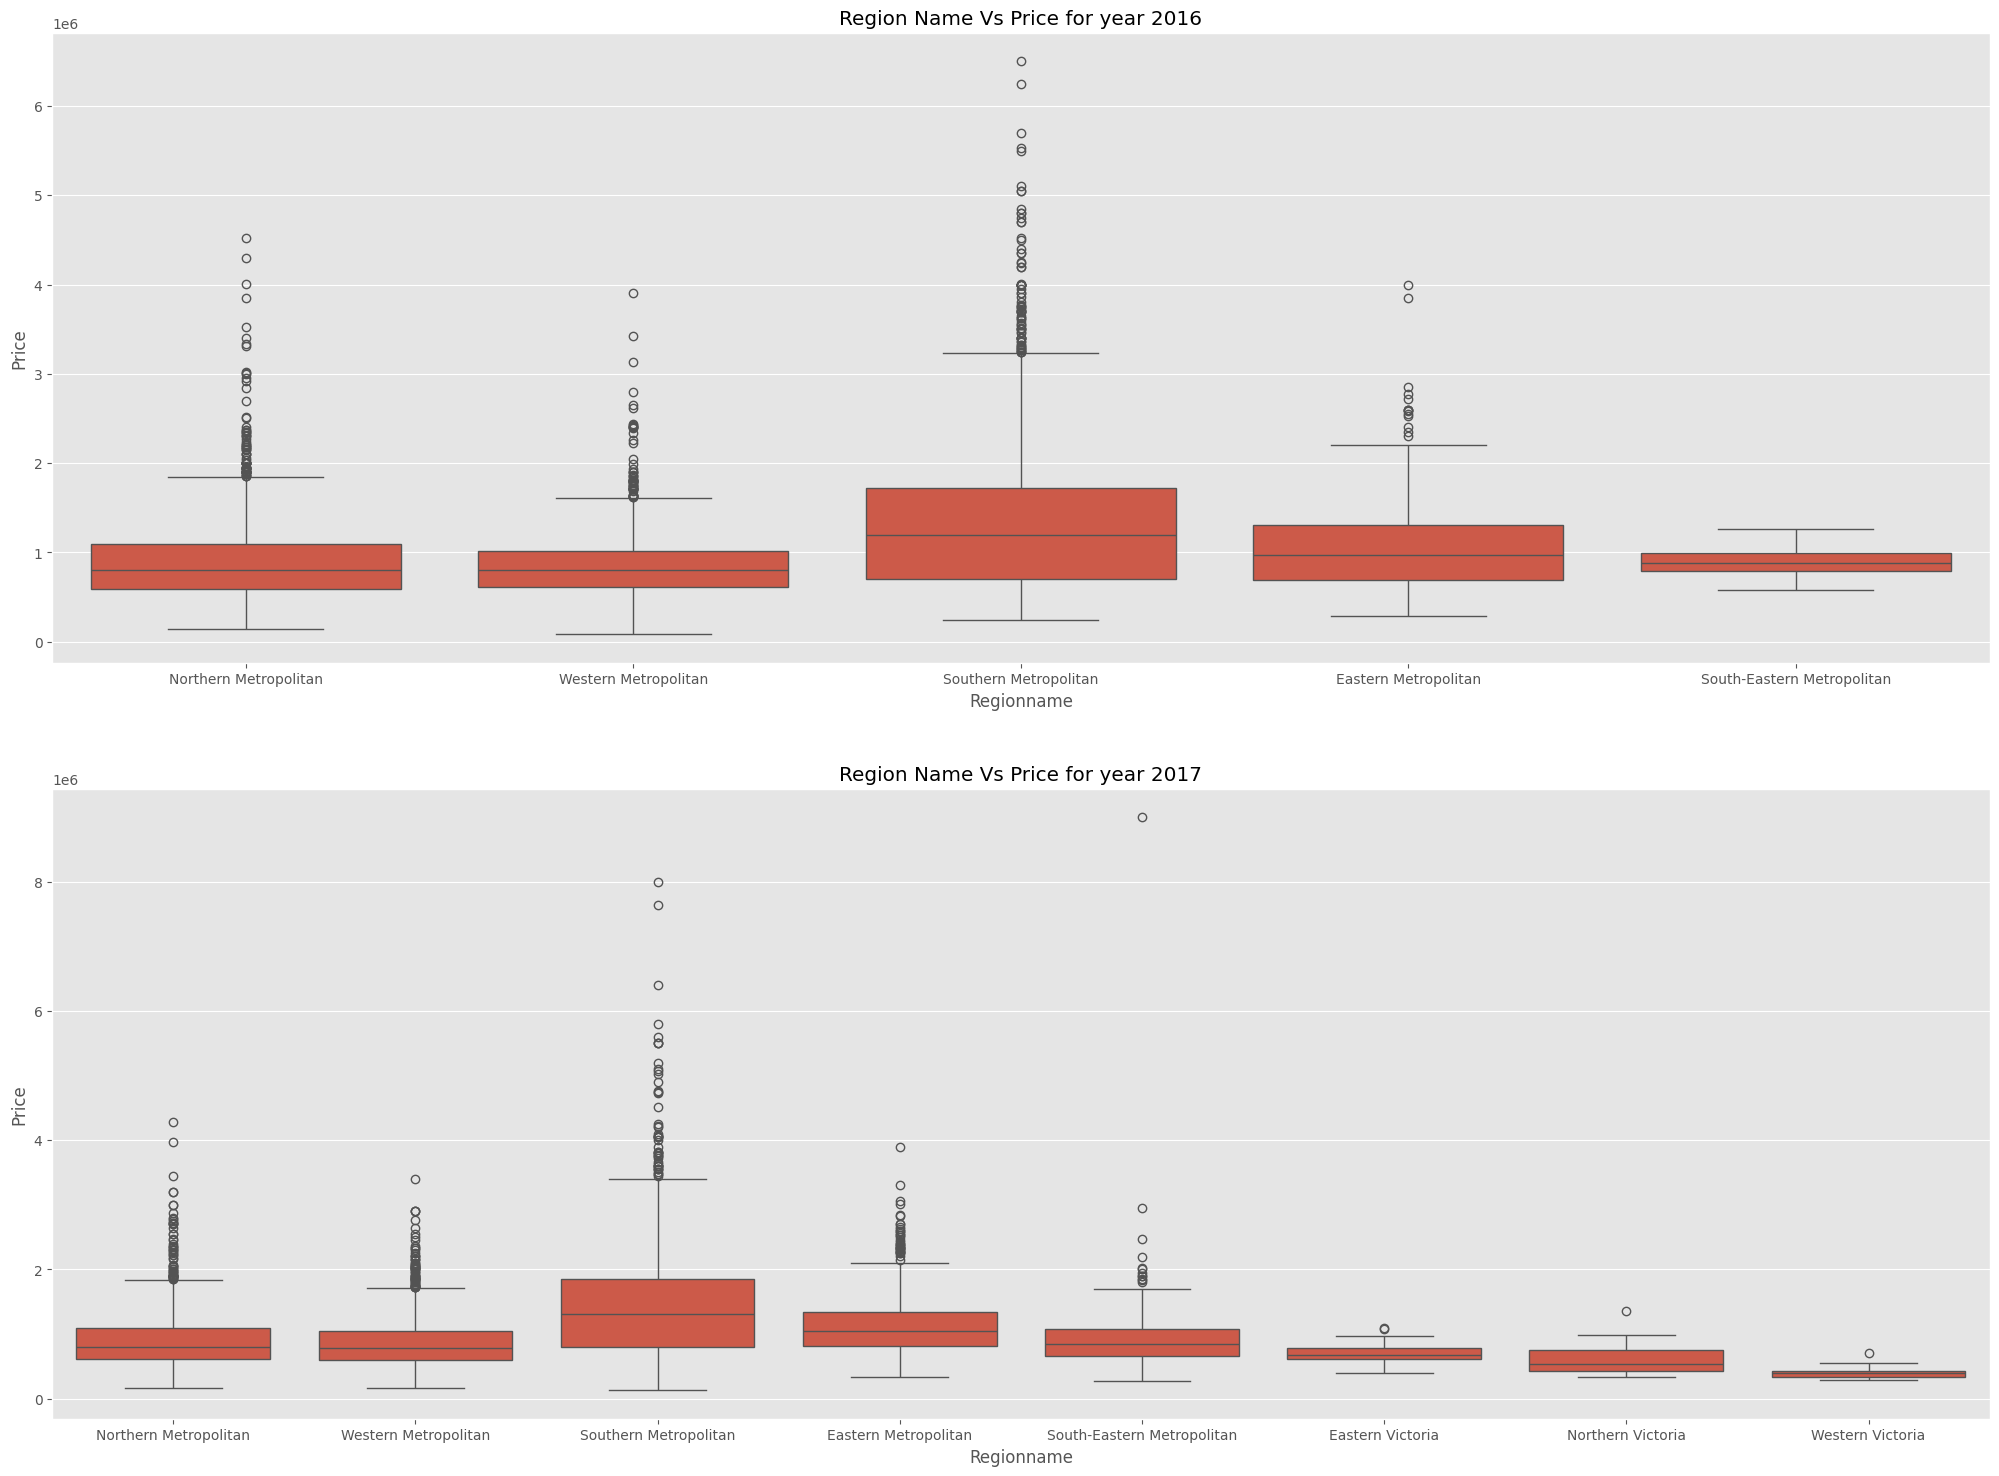

In [21]:
fig = plt.figure(figsize=(25,18))

plt.subplot(2,1,1)
sns.boxplot(x='Regionname',y='Price', data=year_2016_df)
plt.title('Region Name Vs Price for year 2016')

plt.subplot(2,1,2)
sns.boxplot(x='Regionname',y='Price', data=year_2017_df)
plt.title('Region Name Vs Price for year 2017')

plt.show()

The code groups the data by year, month name, and suburb and calculates the minimum property count and mean price for each group. It then creates a new dataframe with the aggregated values and resets the index. The column names are also renamed to 'Total_Property' and 'Mean_price' for clarity.






In [22]:
grouped_df = data.groupby(['Year','Month_name', 'Suburb'])
ym_df = grouped_df.agg({'Propertycount': 'min',
               'Price':'mean'})
ym_df.reset_index(inplace=True)
ym_df.rename(columns={'Propertycount':'Total_Property', 'Price':'Mean_price'}, inplace=True)


In [23]:
ym_df.head()

,Year,Month_name,Suburb,Total_Property,Mean_price
0,2016,April,Airport West,3464.0,7.460000e+05
1,2016,April,Albert Park,3280.0,2.050000e+06
2,2016,April,Alphington,2211.0,1.540000e+06
3,2016,April,Altona,5301.0,6.616667e+05
4,2016,April,Altona North,5132.0,5.900000e+05


The code filters the 'ym_df' dataframe to create two new dataframes: 'df_2016' contains the rows where the 'Year' column is equal to 2016, and 'df_2017' contains the rows where the 'Year' column is equal to 2017.






In [24]:
df_2016 = ym_df[ym_df['Year']==2016]
df_2017 = ym_df[ym_df['Year']==2017]

The code creates a figure with two subplots. In the first subplot, it displays a bar plot showing the total property count for each month in the year 2016. In the second subplot, it shows a line plot representing the mean price for each month in the year 2016.






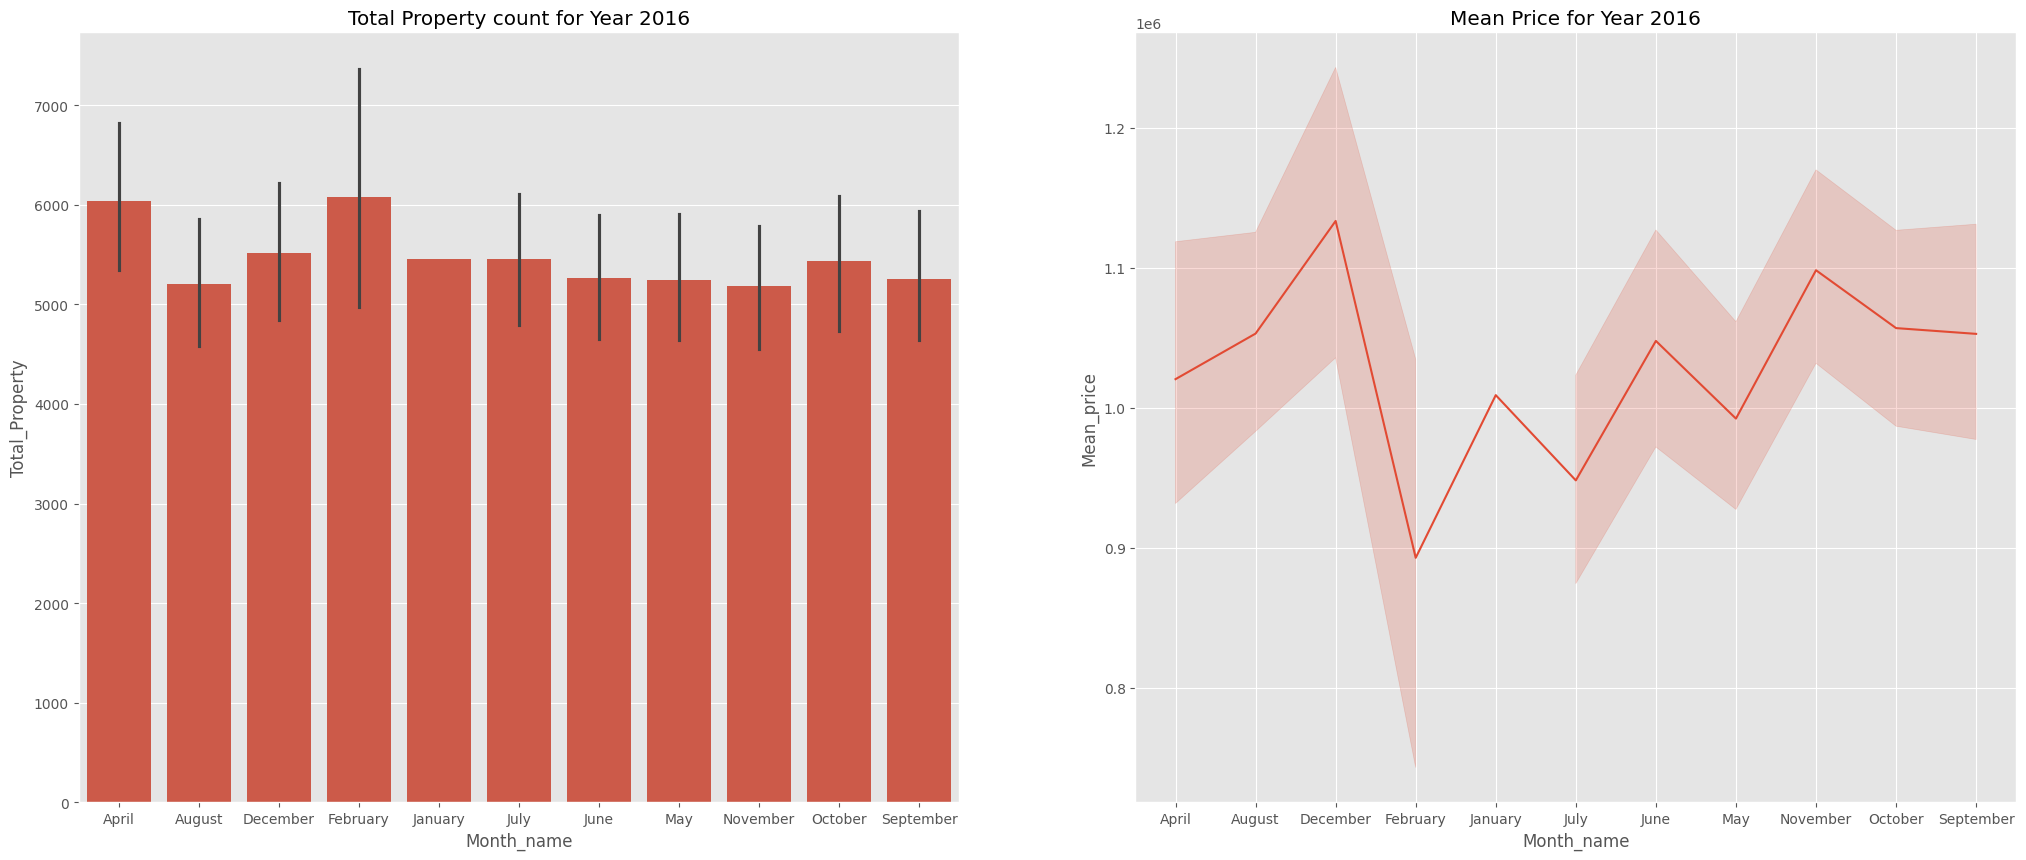

In [25]:
fig = plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
sns.barplot(x='Month_name',y='Total_Property', data=df_2016)
plt.title('Total Property count for Year 2016')

plt.subplot(1,2,2)
sns.lineplot(x='Month_name',y='Mean_price', data=df_2016)
plt.title('Mean Price for Year 2016')

plt.show()

The code creates a figure with two subplots. In the first subplot, it displays a bar plot showing the total property count for each month in the year 2017. In the second subplot, it shows a line plot representing the mean price for each month in the year 2017.






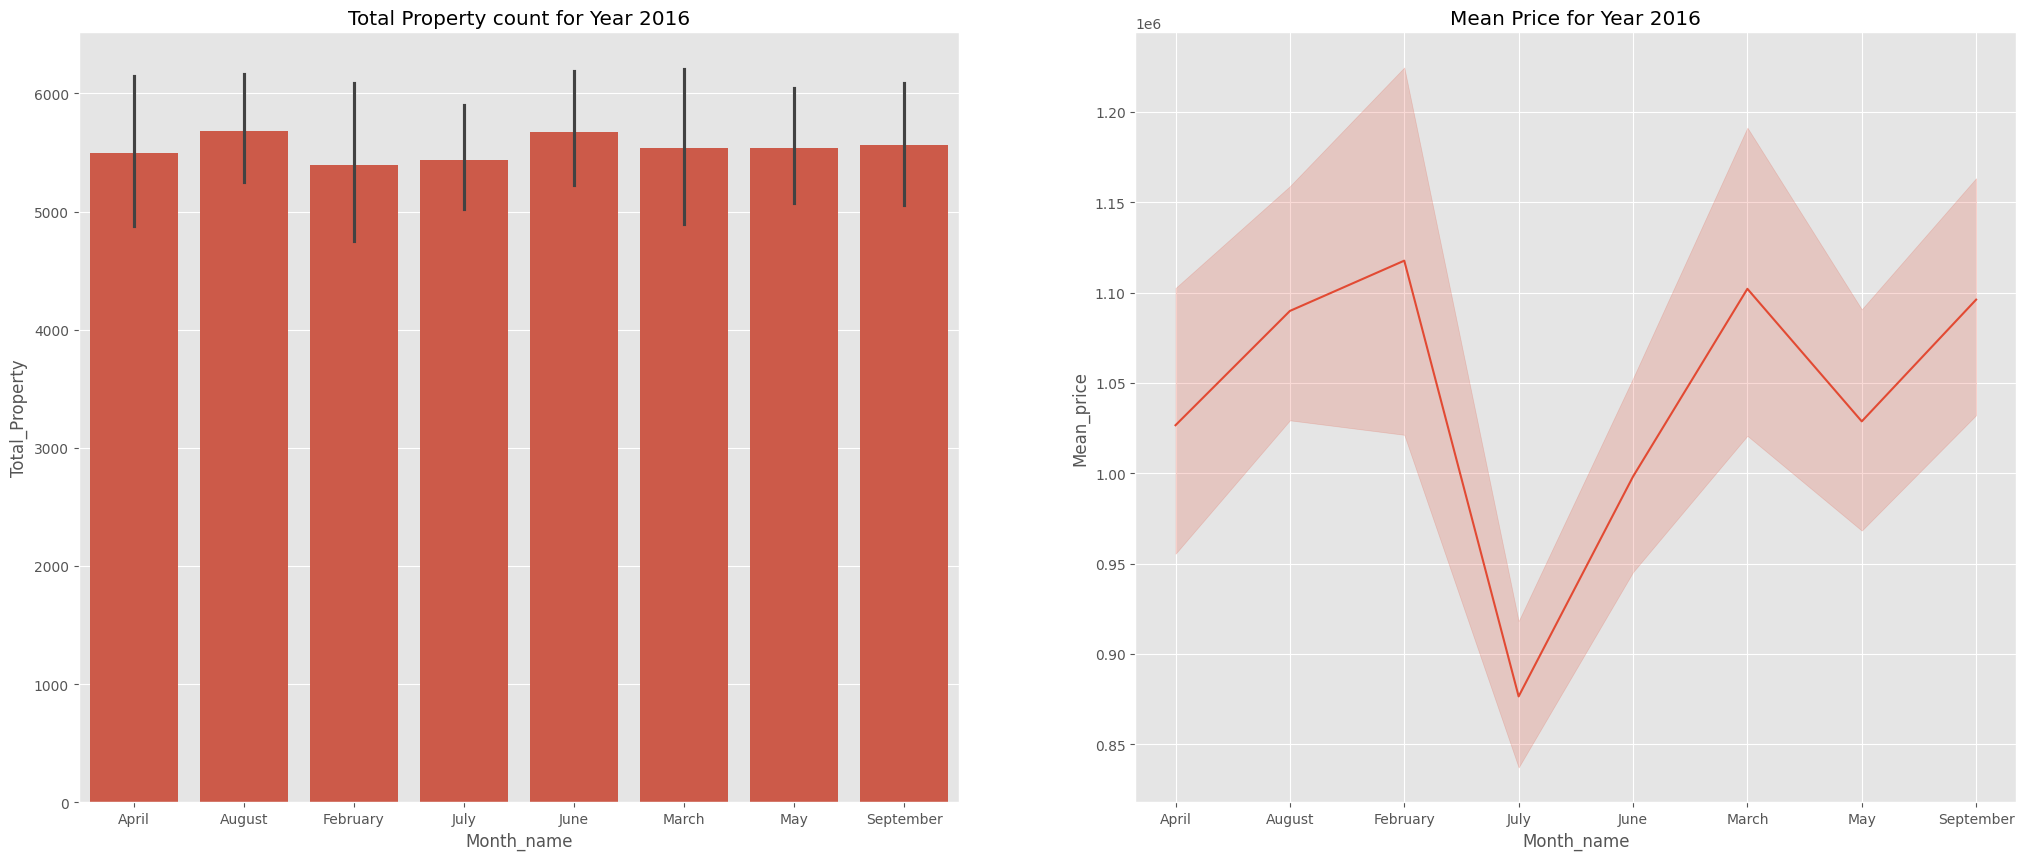

In [26]:
fig = plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
sns.barplot(x='Month_name',y='Total_Property', data=df_2017)
plt.title('Total Property count for Year 2016')

plt.subplot(1,2,2)
sns.lineplot(x='Month_name',y='Mean_price', data=df_2017)
plt.title('Mean Price for Year 2016')

plt.show()

The code groups the data by year and suburb and calculates the sum of prices for each combination. It stores the result in the "suburb_df" DataFrame.






In [27]:
suburb_gp = data.groupby(['Year','Suburb'])
suburb_df = suburb_gp.agg({'Price': sum})

C:\Users\anmol\AppData\Local\Temp\ipykernel_21740\1356679141.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  suburb_df = suburb_gp.agg({'Price': sum})


The code filters the "suburb_df" DataFrame for the year 2016 and selects the top 5 rows with the largest values in the 'Price' column. It then applies a background gradient style to highlight these rows based on the 'Price' values.



In [29]:
suburb_df.loc[(2016,),:].nlargest(5,'Price').style.background_gradient(cmap='Spectral', subset=pd.IndexSlice[:, 'Price'])

,Price
Suburb,
Brighton,185443388.000000
Glen Iris,175232000.000000
Richmond,173040750.000000
Balwyn North,166562300.000000
Kew,163441500.000000


The code filters the "suburb_df" DataFrame for the year 2017 and selects the top 5 rows with the largest values in the 'Price' column. It then applies a background gradient style to highlight these rows based on the 'Price' values.






In [30]:
suburb_df.loc[(2017,),:].nlargest(5,'Price').style.background_gradient(cmap='Spectral', subset=pd.IndexSlice[:, 'Price'])

,Price
Suburb,
Brighton,173566000.000000
Kew,147801500.000000
Glen Iris,141612500.000000
Balwyn North,140110000.000000
Camberwell,124307800.000000


The code filters the "suburb_df" DataFrame for the year 2016 and selects the top 5 rows with the smallest values in the 'Price' column. It then applies a background gradient style to highlight these rows based on the 'Price' values.






In [31]:
suburb_df.loc[(2016,),:].nsmallest(5,'Price').style.background_gradient(cmap='Spectral', subset=pd.IndexSlice[:, 'Price'])

,Price
Suburb,
Campbellfield,823000.000000
Kooyong,1290000.000000
Brooklyn,1322000.000000
Seaholme,2275000.000000
Docklands,2530000.000000


###### Bottom 5 Suburbs in 2017

The code filters the "suburb_df" DataFrame for the year 2017 and selects the top 5 rows with the smallest values in the 'Price' column. It then applies a background gradient style to highlight these rows based on the 'Price' values.






In [32]:
suburb_df.loc[(2017,),:].nsmallest(5,'Price').style.background_gradient(cmap='Spectral', subset=pd.IndexSlice[:, 'Price'])

,Price
Suburb,
Bacchus Marsh,285000.000000
Rockbank,340000.000000
Wallan,366000.000000
Brookfield,456000.000000
Bullengarook,535000.000000


# Predicting Price with Random Forest Regressor

In [33]:
data.head() #let's again remind ourselves about available variables

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month_name,day,Year
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,December,3,2016
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,February,4,2016
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,March,4,2017
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,March,4,2017
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,June,4,2016


In [34]:
print('There are {} observations in the dataset'.format(len(data)))
print('\n')
print('There are {} unique observations in Address variable'.format(data['Address'].nunique()))
print('There are {} unique observations in Postcode variable'.format(data['Postcode'].nunique()))

There are 13580 observations in the dataset


There are 13378 unique observations in Address variable
There are 198 unique observations in Postcode variable


Dropping columns which aren't going to help in our model


In [35]:

data.drop(labels=['Address','Date','Lattitude','Longtitude'],axis=1, inplace=True)

# Splitting the dataset

The code separates the dataset into input features (stored in variable 'x') and the target variable 'Price' (stored in variable 'y') by removing the 'Price' column from the original dataset.







In [36]:
x = data.drop('Price', axis=1)
y = data['Price']

In [37]:
from sklearn.model_selection import train_test_split

The code splits the input features and target variable into training and testing sets using the train_test_split function from scikit-learn. The training set is stored in variables x_train and y_train, while the testing set is stored in variables x_test and y_test. The testing set size is set to 20% of the data, and a random_state of 0 is used for reproducibility.



In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# Variable Analysis

##### Understading Variables

The code calculates the correlation matrix of the independent variables in the training set using pandas corr() function and rounds the values to two decimal places. It then visualizes the correlation matrix as a heatmap using seaborn, with the correlation values displayed on the heatmap.






In [39]:
from feature_engine.selection import SmartCorrelatedSelection

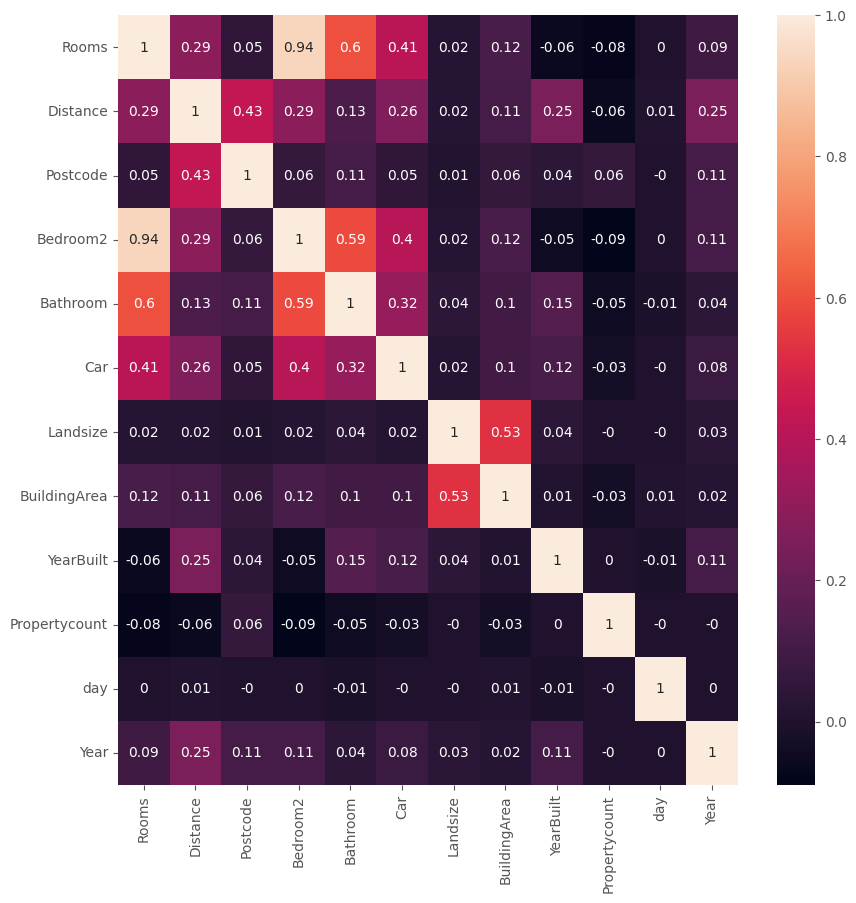

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_columns = x_train.select_dtypes(include=np.number)

# Calculate the correlations
correlation_matrix = np.round(numeric_columns.corr(), 2)

# Plot the correlation matrix using seaborn
fig = plt.figure(figsize=(10, 10))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()


The code initializes and fits a feature selection model using the SmartCorrelatedSelection algorithm. It specifies various parameters such as the correlation method, threshold, missing value treatment, selection method, estimator, scoring metric, and cross-validation. The model is then fitted to the training data (x_train) to identify and select highly correlated features.



In [45]:
correlated = SmartCorrelatedSelection(
    variables= None,
    method = 'pearson',
    threshold = 0.8,
    missing_values = 'ignore',
    selection_method = 'variance',
    estimator=None,
    scoring = 'roc_auc',
    cv=3)

correlated.fit(x_train)

SmartCorrelatedSelection(selection_method='variance')

In [46]:
correlated.features_to_drop_

['Rooms']

The code applies the feature selection model (SmartCorrelatedSelection) to the training data (x_train) and transforms it to include only the selected features. The same transformation is then applied to the test data (x_test) to ensure consistency in the feature set used for modeling.






In [47]:
x_train = correlated.transform(x_train)
x_test = correlated.transform(x_test)

The code separates the variables in the dataset into three categories: discrete variables (with fewer than 30 unique values), continuous variables (excluding the discrete variables), and categorical variables. It then prints the count of variables in each category.






In [48]:
# make a list of numeric variables

descrete_var = [var for var in x_train.columns if x_train[var].dtypes != 'O' and x_train[var].nunique() < 30]
continuous_var = [var for var in x_train.columns if x_train[var].dtypes != 'O' and var not in descrete_var]

categorical_var = [var for var in x_train.columns if x_train[var].dtypes == 'O']

print('There are {} descrete variables'.format(len(descrete_var)))
print('There are {} continuous variables'.format(len(continuous_var)))
print('There are {} categorical variables'.format(len(categorical_var)))

There are 5 descrete variables
There are 6 continuous variables
There are 7 categorical variables


In [49]:
descrete_var

['Bedroom2', 'Bathroom', 'Car', 'day', 'Year']

In [50]:
continuous_var

['Distance',
 'Postcode',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Propertycount']

In [51]:
categorical_var

['Suburb',
 'Type',
 'Method',
 'SellerG',
 'CouncilArea',
 'Regionname',
 'Month_name']

##### Missing Data

The code calculates the proportion of missing values in each feature of the training dataset x_train.






In [52]:
x_train.isnull().mean()

Suburb           0.000000
Type             0.000000
Method           0.000000
SellerG          0.000000
Distance         0.000000
Postcode         0.000000
Bedroom2         0.000000
Bathroom         0.000000
Car              0.004510
Landsize         0.000000
BuildingArea     0.474595
YearBuilt        0.396447
CouncilArea      0.098675
Regionname       0.000000
Propertycount    0.000000
Month_name       0.000000
day              0.000000
Year             0.000000
dtype: float64

The code calculates the proportion of missing values in each feature of the test dataset x_test.






In [53]:
x_test.isnull().mean()

Suburb           0.000000
Type             0.000000
Method           0.000000
SellerG          0.000000
Distance         0.000000
Postcode         0.000000
Bedroom2         0.000000
Bathroom         0.000000
Car              0.004786
Landsize         0.000000
BuildingArea     0.476436
YearBuilt        0.393225
CouncilArea      0.109352
Regionname       0.000000
Propertycount    0.000000
Month_name       0.000000
day              0.000000
Year             0.000000
dtype: float64

##### Categorical Variables

In [54]:
# cardinality in categorical variables

for var in categorical_var:
    print('Number of labels in {}: {}'.format(var, x_train[var].nunique()))

Number of labels in Suburb: 308
Number of labels in Type: 3
Number of labels in Method: 5
Number of labels in SellerG: 251
Number of labels in CouncilArea: 33
Number of labels in Regionname: 8
Number of labels in Month_name: 12


##### Distribution of Varibales

The code defines a function called diagnostic_plot that generates a set of three plots for a given variable var in a DataFrame df. The plots include a histogram to visualize the distribution of the variable, a probability plot to assess the normality of the variable's distribution, and a boxplot to identify potential outliers.






In [55]:
# I will create a function which will help in identifying
# distribution and outliers at the sametime

def diagnostic_plot(df, var):
    fig = plt.figure(figsize=(15,4))

    plt.subplot(1,3,1)
    df[var].hist(bins=50)
    plt.title('Distribution of {}'.format(var))

    plt.subplot(1,3,2)
    stats.probplot(df[var], dist='norm', plot=plt)
    plt.ylabel('RM Quantiles')

    plt.subplot(1,3,3)
    sns.boxplot(y=df[var])
    plt.title('Boxplot')

    plt.show()

The code iterates over each variable in the list continuous_var and calls the diagnostic_plot function to generate diagnostic plots for each continuous variable in the x_train DataFrame.






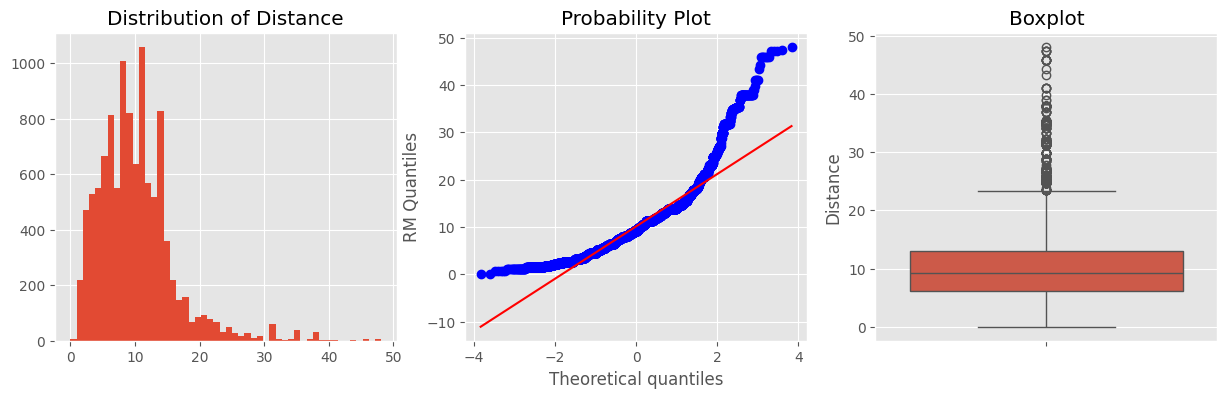

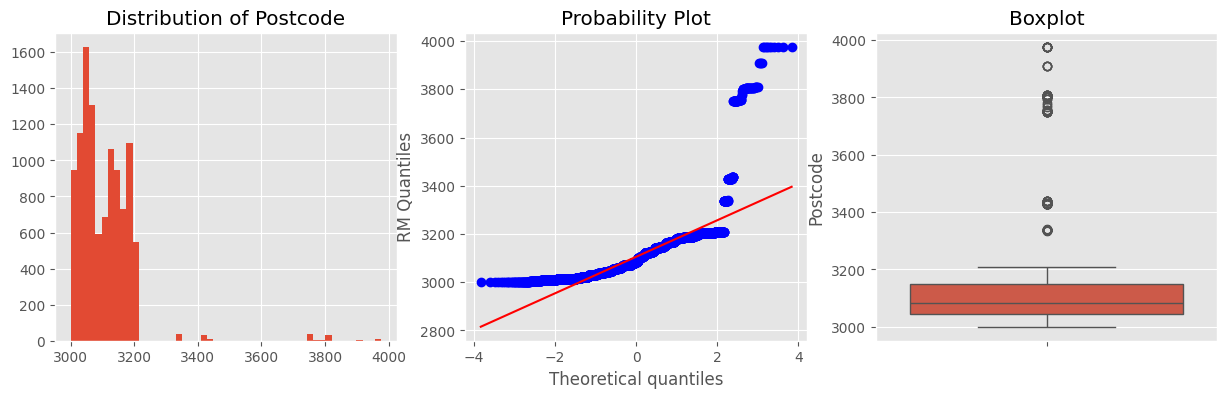

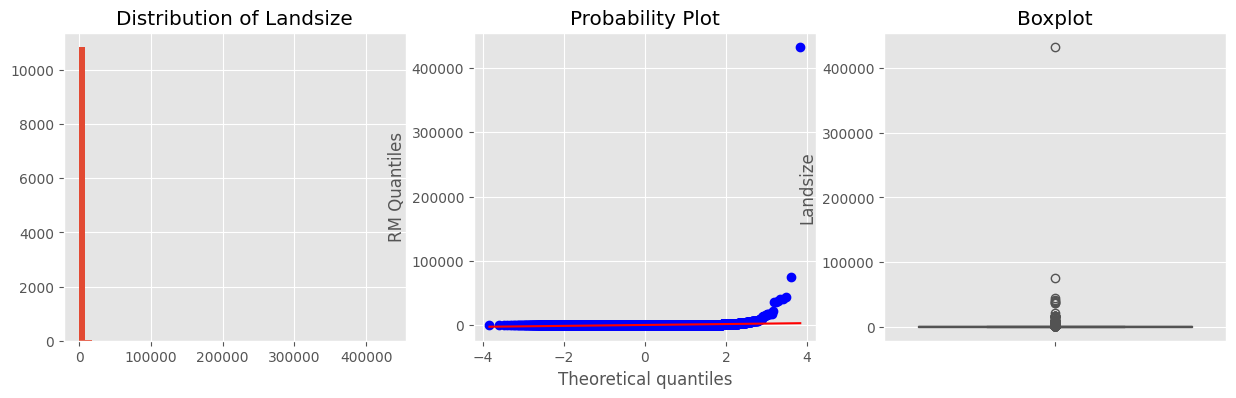

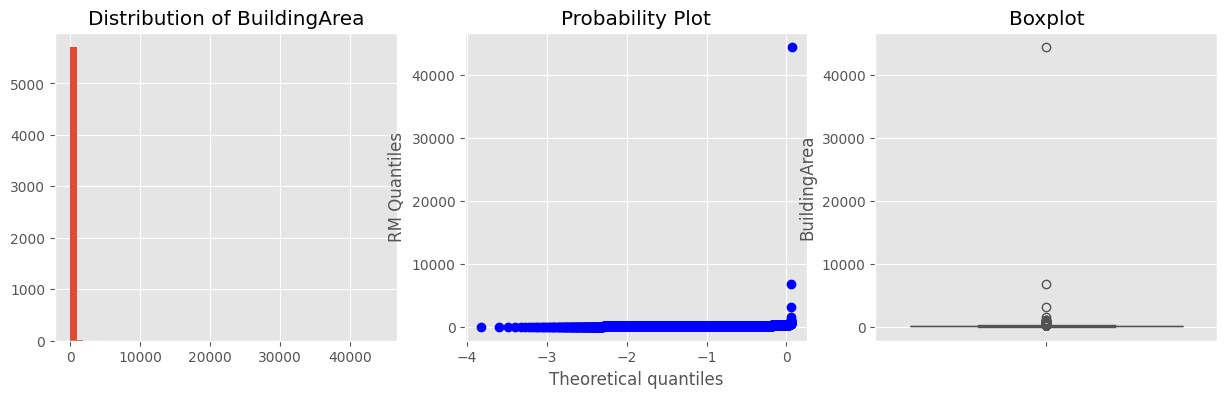

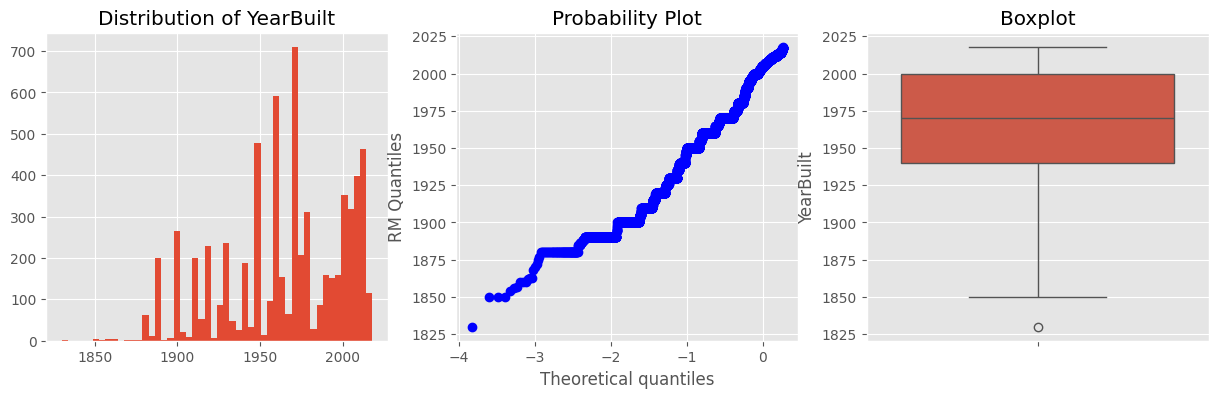

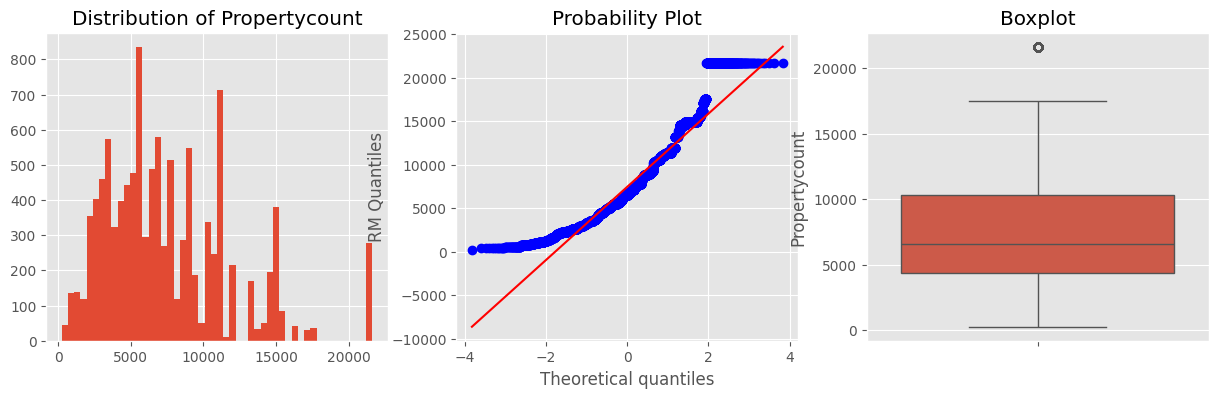

In [56]:
for var in continuous_var:
    diagnostic_plot(x_train, var)

# Feature Engineering

##### Missing Value Imputation

The code drops the columns 'BuildingArea' and 'YearBuilt' from both the x_train and x_test DataFrames, as they contain a high amount of missing values and using them in the model could lead to inaccurate predictions.






In [57]:
# as the amount of missing values are higher in BuildingArea and YearBuilt
#  variables I will drop them because using them for model may cause random
#  prediction because the values we may impute will not be accurate

x_train.drop(columns=['BuildingArea','YearBuilt'], axis=1, inplace=True)
x_test.drop(columns=['BuildingArea','YearBuilt'], axis=1, inplace=True)

The code removes the variables 'BuildingArea' and 'YearBuilt' from the list of continuous variables continuous_var.






In [58]:
continuous_var.remove('BuildingArea')
continuous_var.remove('YearBuilt')

In [59]:
# for car and CouncilArea missing values are less so I will use random
# sample imputation

from feature_engine.imputation import RandomSampleImputer

The code initializes a RandomSampleImputer object with the variables 'Car' and 'CouncilArea' specified for imputation, and fits it to the training data x_train.






In [60]:
random_imputer = RandomSampleImputer(variables=['Car', 'CouncilArea'])

random_imputer.fit(x_train)

RandomSampleImputer(variables=['Car', 'CouncilArea'])

The code applies the random imputation strategy to fill in missing values in the variables 'Car' and 'CouncilArea' for both the training and test datasets (x_train and x_test, respectively).



In [61]:
x_train = random_imputer.transform(x_train)
x_test = random_imputer.transform(x_test)

In [62]:
x_train.isnull().mean()

Suburb           0.0
Type             0.0
Method           0.0
SellerG          0.0
Distance         0.0
Postcode         0.0
Bedroom2         0.0
Bathroom         0.0
Car              0.0
Landsize         0.0
CouncilArea      0.0
Regionname       0.0
Propertycount    0.0
Month_name       0.0
day              0.0
Year             0.0
dtype: float64

In [63]:
x_test.isnull().mean()

Suburb           0.0
Type             0.0
Method           0.0
SellerG          0.0
Distance         0.0
Postcode         0.0
Bedroom2         0.0
Bathroom         0.0
Car              0.0
Landsize         0.0
CouncilArea      0.0
Regionname       0.0
Propertycount    0.0
Month_name       0.0
day              0.0
Year             0.0
dtype: float64

The code removes the variable 'Postcode' from the list of continuous variables (continuous_var) and adds it to the list of discrete variables (descrete_var).






In [64]:
continuous_var.remove('Postcode')
descrete_var.append('Postcode')

The code changes the data type of the variables in descrete_var from numeric to object (categorical) in both the training and testing datasets (x_train and x_test).






In [65]:
# I will treat discreate variable as categorical variable so later I can encode

x_train[descrete_var] = x_train[descrete_var].astype('O')
x_test[descrete_var] = x_test[descrete_var].astype('O')

The code calculates and prints the relative frequencies of each unique value in the variables specified in descrete_var within the training dataset (x_train).






In [66]:
for var in descrete_var:
    print(x_train.groupby([var])[var].count()/len(x_train))

Bedroom2
0.0     0.001381
1.0     0.050810
2.0     0.275681
3.0     0.432069
4.0     0.192010
5.0     0.041697
6.0     0.004694
7.0     0.000828
8.0     0.000460
9.0     0.000184
10.0    0.000092
20.0    0.000092
Name: Bedroom2, dtype: float64
Bathroom
0.0    0.002485
1.0    0.553203
2.0    0.365427
3.0    0.068115
4.0    0.008100
5.0    0.002025
6.0    0.000460
8.0    0.000184
Name: Bathroom, dtype: float64
Car
0.0     0.076307
1.0     0.409702
2.0     0.412739
3.0     0.053756
4.0     0.037279
5.0     0.004694
6.0     0.003866
7.0     0.000644
8.0     0.000736
9.0     0.000092
10.0    0.000184
Name: Car, dtype: float64
day
1     0.020434
3     0.083027
4     0.042434
6     0.021815
7     0.032309
8     0.062500
9     0.014820
10    0.040317
11    0.008837
12    0.052559
13    0.028351
14    0.014359
15    0.043446
16    0.045563
17    0.045287
18    0.041421
19    0.034242
20    0.019422
22    0.062040
23    0.025865
24    0.042894
25    0.024116
26    0.027154
27    0.077043
28    0

The code calculates and prints the relative frequencies of each unique value in the variables specified in categorical_var within the training dataset (x_train).






In [67]:
for var in categorical_var:
    print(x_train.groupby([var])[var].count()/len(x_train))

Suburb
Abbotsford      0.004050
Aberfeldie      0.003038
Airport West    0.005155
Albanvale       0.000460
Albert Park     0.005247
                  ...   
Wollert         0.000644
Wyndham Vale    0.000368
Yallambie       0.001197
Yarra Glen      0.000092
Yarraville      0.011966
Name: Suburb, Length: 308, dtype: float64
Type
h    0.696060
t    0.081738
u    0.222202
Name: Type, dtype: float64
Method
PI    0.114691
S     0.665409
SA    0.006996
SP    0.123987
VB    0.088918
Name: Method, dtype: float64
SellerG
@Realty                  0.000184
ASL                      0.000276
Abercromby's             0.001749
Ace                      0.000092
Alexkarbon               0.002853
                           ...   
hockingstuart/Village    0.000092
iOne                     0.000092
iProperty                0.000092
iSell                    0.000644
iTRAK                    0.000828
Name: SellerG, Length: 251, dtype: float64
CouncilArea
Banyule              0.048325
Bayside              0.0

In [68]:
from feature_engine.encoding import RareLabelEncoder

The code initializes and fits a rare label encoder (RareLabelEncoder) to the specified categorical variables in x_train, with the aim of identifying and encoding rare categories.






In [69]:
rare_encoder = RareLabelEncoder(
                tol = 0.05,
                n_categories = 1,
                max_n_categories = None,
                replace_with = 'Rare',
                variables = ['Type', 'Method', 'SellerG', 'Regionname', 'Month_name', 'Bathroom', 'day', 'Bedroom2','Year', 'Car','CouncilArea'] )

rare_encoder.fit(x_train)

RareLabelEncoder(n_categories=1,
                 variables=['Type', 'Method', 'SellerG', 'Regionname',
                            'Month_name', 'Bathroom', 'day', 'Bedroom2', 'Year',
                            'Car', 'CouncilArea'])

The code applies the rare label encoding transformation to the categorical variables in both the training and testing datasets, using the fitted RareLabelEncoder object.






In [70]:
x_train = rare_encoder.transform(x_train)
x_test = rare_encoder.transform(x_test)

The code applies the rare label encoding transformation to the 'Suburb' and 'Postcode' variables with a lower tolerance, using the RareLabelEncoder object. The transformed data is then assigned back to the training and testing datasets.






In [71]:
# as Suburb and Postcode are high cardinal variables I am taking lower tolerance

suburb_postcode_rare_encoder = RareLabelEncoder(tol = 0.02,
                n_categories = 1,
                max_n_categories = None,
                replace_with = 'Rare',
                variables = ['Suburb','Postcode'])

suburb_postcode_rare_encoder.fit(x_train)

x_train = suburb_postcode_rare_encoder.transform(x_train)
x_test = suburb_postcode_rare_encoder.transform(x_test)

In [72]:
from feature_engine.encoding import MeanEncoder

The code fits a mean encoding transformation to the categorical and discrete variables specified in categorical_var and descrete_var, using the MeanEncoder object. The encoding is based on the target variable y_train.






In [73]:
mean_encoder = MeanEncoder(variables=categorical_var+descrete_var)

mean_encoder.fit(x_train,y_train)

MeanEncoder(variables=['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea',
                       'Regionname', 'Month_name', 'Bedroom2', 'Bathroom',
                       'Car', 'day', 'Year', 'Postcode'])

The code applies the mean encoding transformation to the training and test datasets x_train and x_test, respectively, using the previously fitted mean_encoder object. This replaces the categorical and discrete variables with their corresponding mean encoded values based on the target variable.






In [74]:
x_train = mean_encoder.transform(x_train)
x_test = mean_encoder.transform(x_test)

##### Feature Selection

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from feature_engine.selection import RecursiveFeatureElimination

The code initializes a random forest regressor model called regressor with 50 decision trees and a random state of 0.






In [76]:
regressor = RandomForestRegressor(n_estimators=50,random_state=0)

The code initializes a feature selector called selector using recursive feature elimination with a random forest regressor as the estimator. It fits the selector on the training data (x_train and y_train) using a cross-validated approach with a threshold of 0.01 for feature elimination.






In [77]:
selector = RecursiveFeatureElimination( estimator=regressor,
                                       scoring='r2',
                                       variables=None,
                                       threshold = 0.01,
                                       cv = 3
                                      )

selector.fit(x_train,y_train)

RecursiveFeatureElimination(estimator=RandomForestRegressor(n_estimators=50,
                                                            random_state=0),
                            scoring='r2')

In [78]:
selector.initial_model_performance_

0.7519079522710213

The code plots two subplots side by side. In the first subplot, it shows the importance of features based on the initial model using a bar plot. In the second subplot, it shows the performance change when each feature was added to the model using a bar plot.






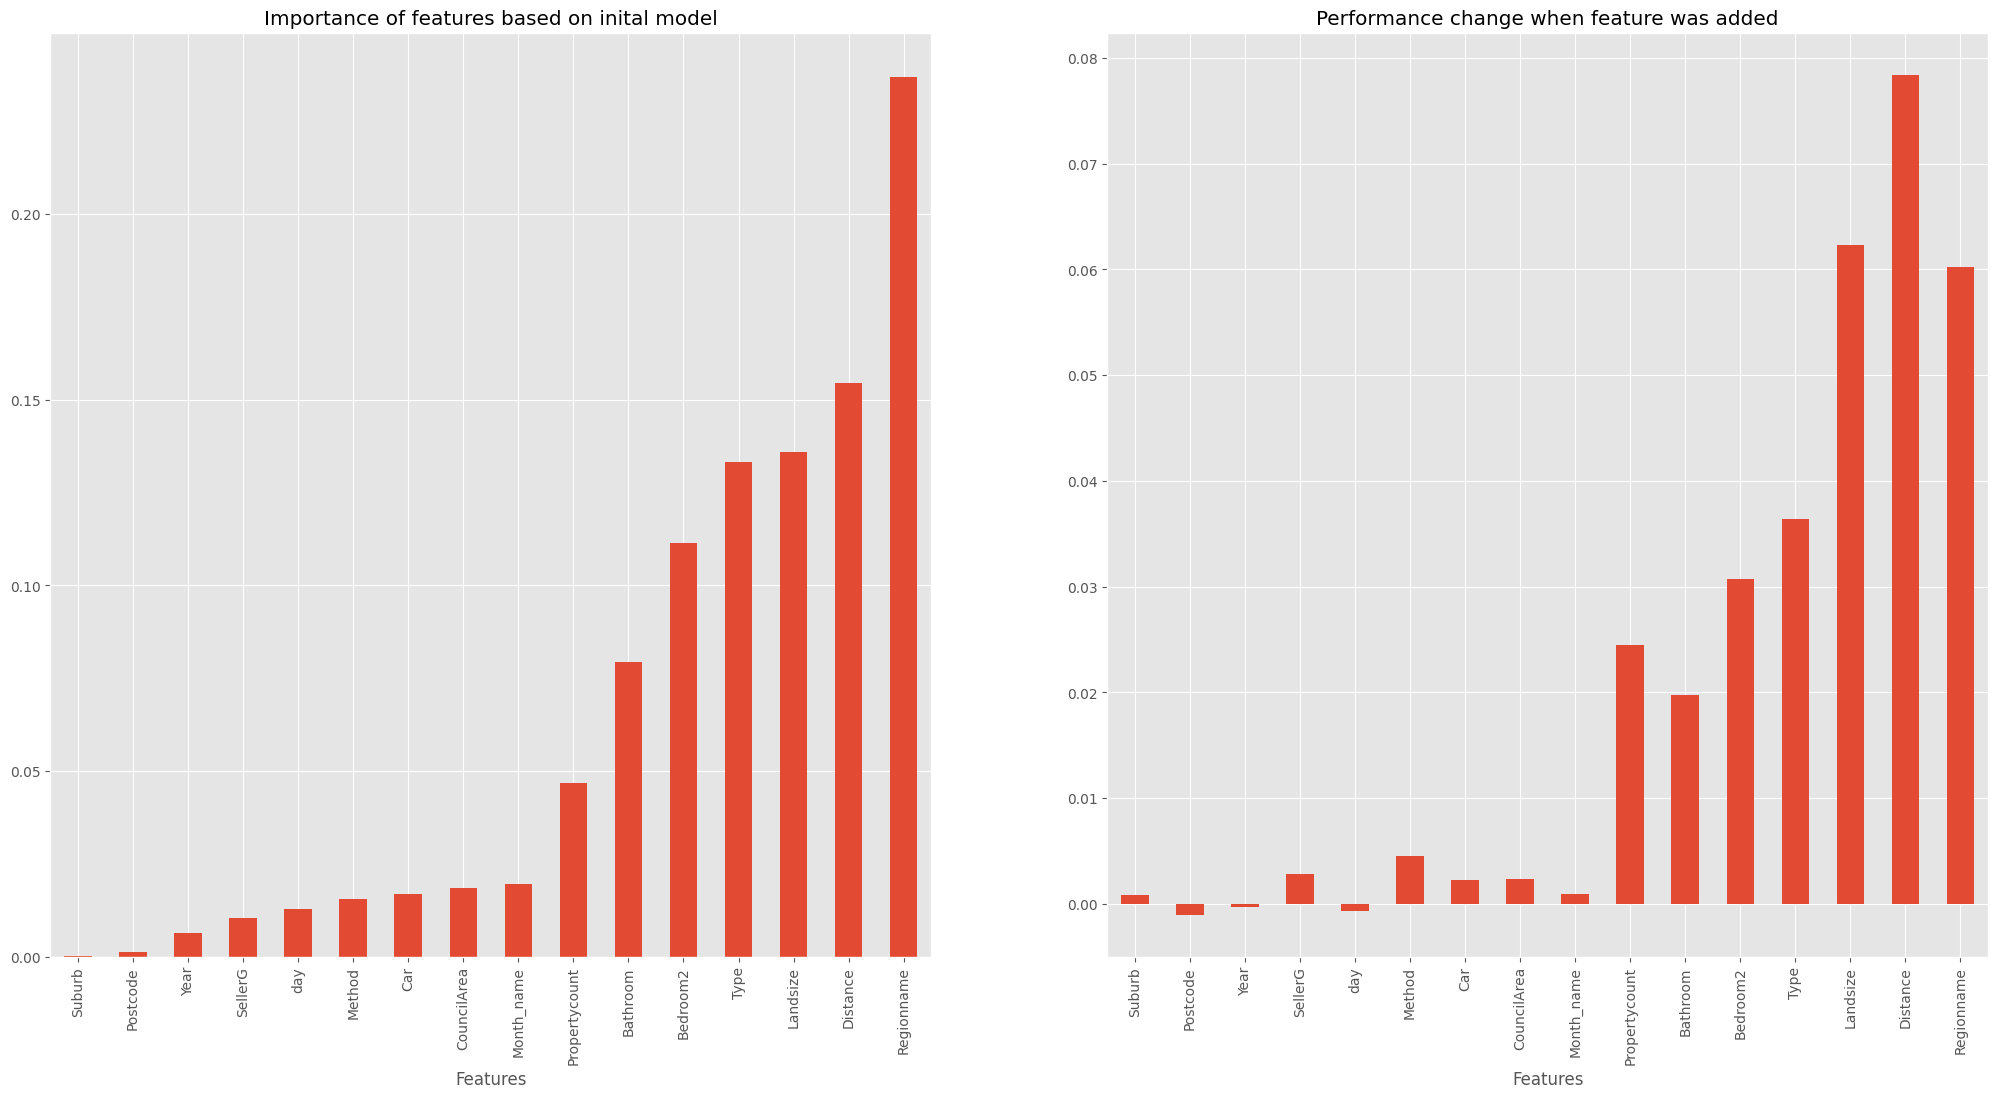

In [79]:
plt.figure(figsize=(25,12))

plt.subplot(1,2,1)
selector.feature_importances_.plot.bar()
plt.xlabel('Features')
plt.title('Importance of features based on inital model')

plt.subplot(1,2,2)
pd.Series(selector.performance_drifts_).plot.bar()
plt.xlabel('Features')
plt.title('Performance change when feature was added')

plt.show()

In [80]:
selector.features_to_drop_

['Suburb',
 'Method',
 'SellerG',
 'Postcode',
 'Car',
 'CouncilArea',
 'Month_name',
 'day',
 'Year']

The code selects the features from the training and test datasets based on the feature selection performed by the RecursiveFeatureElimination model. It transforms the datasets to include only the selected features.






In [81]:
x_train_selected = selector.transform(x_train)
x_test_selected = selector.transform(x_test)

##### Final Model

The function run_regressor trains a RandomForestRegressor model using the provided training data and targets. It then makes predictions on the test data and calculates and prints the mean absolute error (MAE), mean squared error (MSE), root mean squared error (RMSE), and R-squared score.






In [82]:
def run_regressor(tain_df, test_df, train_target,test_target):
    regressor = RandomForestRegressor(n_estimators=50, random_state=0)
    regressor.fit(tain_df,train_target)
    pred = regressor.predict(test_df)

    print('MAE')
    print(mean_absolute_error(test_target,pred))
    print('\n')
    print('MSE')
    print(mean_squared_error(test_target,pred))
    print('\n')
    print('RMSE')
    print(np.sqrt(mean_squared_error(test_target,pred)))
    print('\n')
    print('R2 Score')
    print(r2_score(test_target,pred))

The run_regressor function is called with the selected training and test data along with the corresponding target variables. It trains a RandomForestRegressor model, makes predictions on the test data, and prints the evaluation metrics including MAE, MSE, RMSE, and R-squared score.






In [83]:
run_regressor(x_train_selected,x_test_selected,y_train,y_test)

MAE
185847.6810724956


MSE
92002679358.10574


RMSE
303319.43452094484


R2 Score
0.7671785160249666


The run_regressor function is called with the original training and test data along with the corresponding target variables. It trains a RandomForestRegressor model, makes predictions on the test data, and prints the evaluation metrics including MAE, MSE, RMSE, and R-squared score.






In [84]:
run_regressor(x_train,x_test,y_train,y_test)

MAE
180333.82367329407


MSE
82768531387.40778


RMSE
287695.2057080684


R2 Score
0.7905464010559533
